# **Trabalho Prático 04 - Regressão**
### **Professor:** Wagner Meira Jr. (Mineração de Dados)
### **Aluno:** Bernardo Reis de Almeida (2021032234)
### **Tema:** Previsão do Tempo
### **Base de Dados:** https://www.kaggle.com/datasets/sujaykapadnis/whether-prediction-dataset

**Obs.: Nenhuma ferramenta automatizada foi utilizada para a elaboração deste trabalho prático.**

## **Introdução**

As tecnologias em uso estão se tornando cada vez mais inteligentes e capazes. Um dos casos recentes mais famosos talvez seja o Chat GPT, um LLM (“Large Language Model”) capaz de gerar respostas em linguagem natural com base em prompts de um usuário. Seu uso se infiltrou em diversas atividades produtivas ou cotidianas, como geração automática de código, produção de textos e de artigos ou mesmo sugestão de ideias e inspiração criativa. Não restrito a isso, o potencial uso de modelos de aprendizado para auxílio em operações humanas também se manifesta em diversas outras áreas, desde mais gerais, como é o caso do Chat GPT, quanto mais específicas, técnicas e sensíveis, como julgamento em tribunais, diagnóstico médico e, sendo este o objeto do presente trabalho, previsão do tempo.

Uma das maiores susceptibilidades existentes, e, certamente, dotada de grande influência no cotidiano das pessoas, são fenômenos naturais, os quais, aqui, serão encapsulados sob a palavra-chave “tempo”. Chuvas, secas, enchentes, umidade, temperatura, dentre outras “variáveis temporais”, impactam em grande medida diversos cenários potencialmente de grande relevância social e econômica, como ciclos de atividade agropecuária, movimentação pendular e trânsito, manutenção de instalações e infraestrutura, operações que envolvem transmissão de informações em larga escala, dentre outros. Nesse sentido, a “previsão do tempo” é um objeto de profundo interesse para amortecimento de impactos e prevenção de danos causados por esses fenômenos e, naturalmente, é uma área na qual existe uma ampla aplicabilidade para modelos de aprendizado e de regressão.

Sob esse pretexto, o objetivo do presente trabalho prático consiste no treinamento de um modelo de regressão com base em dados relativos ao clima de diversas localidades para fins de previsão do tempo. Tem-se em mente o processo de aprendizado, o ajuste de parâmetros e a análise do comportamento do algoritmo. Para tal, será adotada uma situação-problema simplificada, em que se deseja prever, com base em diversas variáveis independentes relacionadas a umidade, temperatura, dentre outros, se o clima é adequado para um piquenique ou não, sendo esta a variável binária dependente. Porém, os resultados podem ser estendidos e o modelo em si trabalhado para atuar em aplicações mais práticas, como em previsão para estações meteorológicas ou em instalações sensíveis, como usinas de energia, que precisam monitorar constantemente o tempo para tomar ações preventivas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier

sns.set_theme()

# Some libraries generate warnings in regard to deprecated compatibility issues that do not affect the results.
# There are also some UserWarnings in regard to graph plotting that are ignored for better output formatting.
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = UserWarning)

## **Metodologia**

Conforme o modelo CRISP-DM, em um primeiro momento, os objetivos da presente prática serão discutidos na seção [Entendimento do Projeto]. Em seguida, uma análise exploratória dos dados será abordada na seção [Entendimento dos Dados]. Após isso, a preparação efetiva da base para a tarefa será discorrida na seção [Preparação dos Dados]. A escolha e a implementação do modelo de mineração serão discutidos na seção [Modelagem]. Os resultados em si serão apresentados na seção [Apresentação e Validação dos Resultados]. Conclusões e reflexões sobre aplicações no domínio de interesse, assim como sobre o projeto como um todo, estarão na seção [Implantação e Conclusões]. Por fim, as referências bibliográficas utilizadas estarão organizadas na seção [Referências Bibliográficas].

## **Entendimento do Projeto**

O objetivo de negócio do presente estudo consiste, de maneira geral, no aprimoramento da logística e da operacionalização da firma tomando como base as informações relativas a previsões do tempo, colaborando para uma atividade mais produtiva, preventiva e eficaz. Assumindo uma perspectiva mais técnica e orientada à tarefa de mineração em si, tem-se em mente a elaboração de um modelo de previsão baseado em regressão coerente com os dados de treinamento e robusto quanto a aplicações práticas. Esse modelo deve ser capaz de se adequar bem às situações fornecidas e gerar previsões compatíveis com a realidade no sentido da previsão do tempo.

Em termos da definição de “sucesso”, de maneira mais ampla, critérios podem incluir uma redução nos índices de falhas causadas por fenômenos climáticos inesperados, um aprimoramento da eficácia de atividades tomando proveito de certas condições atmosféricas previstas ou, de modo geral, uma melhor capacidade de prevenção e de amortecimento dos impactos causados pelo tempo. Sob um olhar técnico, existem diversas métricas para avaliação da qualidade do aprendizado do modelo e de sua capacidade de previsão. A título de exemplo, uma simples e imediata seria a taxa de acerto quanto aos dados de treinamento ou quanto a dados de teste, mas métricas mais elaboradas podem ser construídas levando em conta detalhes específicos de aplicação e regras de domínio existentes. Além disso, também é interessante agregar à noção de sucesso alguma forma de estudo estatístico para se avaliar a significância dos resultados obtidos, o que contempla a robustez do modelo e seu comportamento perante variados dados.

A principal fonte de recursos para este trabalho consiste na plataforma online “Kaggle”, a qual contém um acervo de diferentes bases de dados e da qual aquele conjunto a ser utilizado foi extraído. Nela, ainda, são disponibilizadas diversas informações imediatas que podem contribuir com o estudo, como uma análise inicial do formato dos dados, a descrição detalhada dos rótulos e dos atributos, potenciais ruídos ou lacunas, dentre outras. Em termos da tarefa de mineração em si, será utilizada como tecnologia de suporte a linguagem de programação “Python” e, especificamente, as bibliotecas “NumPy”, para operações algébricas, “Pandas”, para manipulação e armazenamento dos dados, e “SciKit Learn”, para fins de modelagem e de treinamento.

Em termos de ressalvas, começando pelos dados em si, deve-se considerar a grande variedade de unidades de medida utilizadas por cada atributo, o que pode agregar impactos na disposição espacial e na semântica de cada instância, assim como em sua dimensionalidade, mantendo em mente possíveis efeitos colaterais. Quanto ao treinamento do modelo e em sua aplicabilidade, dois principais pontos podem ser destacados: o impacto da localidade real dos dados nas relações que podem ser aprendidas - dado que a base escolhida diz respeito às características climáticas de diferentes regiões, cada qual dotada de seu clima nativo e de suas peculiaridades, exigindo um ponderamento entre uma maior generalidade e uma maior especificidade - e a temporalidade das informações - dado que o clima é uma entidade extremamente mutável e sujeita à operação do tempo, o que torna difícil a generalização de um modelo treinado com dados estáticos referentes apenas a uma única janela nesse espectro contínuo.

## **Entendimento dos Dados**

A base de dados escolhida é denominada “Weather Prediction dataset” e está disponível por meio do usuário “Sujay Kapadnis” publicamente na plataforma Kaggle. Os dados originais, entretanto, foram coletados pelos autores Klein Tank, A.M.G. e coautores em um projeto intitulado “EUROPEAN CLIMATE ASSESSMENT & DATASET (ECA&D)”. As informações dizem respeito a diversas métricas climáticas capturadas durante o período de 2000 a 2010 em variadas localidades europeias, sendo elas: Basel (Suíça), Budapest (Hungria), Dresden, Düsseldorf, Kassel, München (todas na Alemanha), De Bilt and Maastricht (Países Baixos), Heathrow (Reino Unido), Ljubljana (Eslovênia), Malmo and Stockholm (Suécia), Montélimar, Perpignan and Tours (França), Oslo (Noruega), Roma (Itália), and Sonnblick (Áustria). No total, há 3654 entradas, cada qual caracterizada por 11 atributos climáticos, dentre os quais se tem: temperaturas média, máxima e mínima, velocidade do vento, cobertura de nuvens, dentre outros. Nota-se que existe um conjunto de tais colunas para cada cidade, isto é, cada entrada contém as informações climáticas de todas para uma determinada data, sendo esta um identificador único. De imediato, os metadados sobre a base de dados não indicam ruídos ou lacunas, o que é um ponto positivo. Porém, após uma análise um pouco mais profunda, observa-se que nem todas as cidades contemplam todos os atributos (por exemplo, para a cidade de Basel, não há coluna relativa a velocidade do vento), de modo que alguma seleção ou tratamento serão necessários. A classe real de cada entrada está presente na coluna “picnic_weather”, a qual apresenta o valor verdadeiro se o clima é adequado a um piquenique e falso caso contrário. Ela também é separada por cidades, sendo que cada entrada diz respeito a uma data e contém colunas para cada uma das localidades.

In [ ]:
gdown.download('https://drive.google.com/uc?id=1cxSWxvP1LWqqnvTkwo0pJsLKvTay-lNg', 'climate.csv', quiet = False)
gdown.download('https://drive.google.com/uc?id=1ERCVtHhYqgie8nXyymzCPhUgD0mCroUr', 'labels.csv', quiet=False)

climate = pd.read_csv('climate.csv')
labels = pd.read_csv('labels.csv')

Downloading...
From: https://drive.google.com/uc?id=1cxSWxvP1LWqqnvTkwo0pJsLKvTay-lNg
To: /content/climate.csv
100%|██████████| 2.77M/2.77M [00:00<00:00, 124MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ERCVtHhYqgie8nXyymzCPhUgD0mCroUr
To: /content/labels.csv
100%|██████████| 394k/394k [00:00<00:00, 58.1MB/s]


Um primeiro passo tomado no sentido de se compreender mais a fundo os dados foi reorganizar a base. Originalmente, ela é organizada de tal forma que cada entrada corresponde a uma data no intervalo entre os anos 2000 e 2010 e contém as informações referentes a todas as cidades. Em outras palavras, uma entrada contém os 11 atributos para cada uma das 17 cidades, o que resulta em uma base de tamanho 3654 (quantidade de dias entre 2000 e 2010) por 187 (11 atributos para cada uma das 17 cidades). A ideia que se tem em mente é reestruturar esse formato de tal forma que exista apenas uma coluna por atributo, isto é, 11 colunas no total, e cada entrada seja unicamente identificada pela data e pela cidade. Com isso, o trabalho de agregação das informações referentes a diferentes localidades seria facilitado, além de que cada ponto passa a ser semanticamente consistente com a abstração da "situação climática da cidade X na data Y". O resultado dessa nova organização é uma base de dados de tamanho 62118 (quantidade de dias entre 2000 e 2010 para cada uma das 17 cidades) por 14 (11 atributos climáticos, data, nome da cidade e mês).

In [ ]:
cities = ['BASEL', 'BUDAPEST', 'DE_BILT', 'DRESDEN', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MALMO', 'MONTELIMAR', 'MUENCHEN', 'OSLO', 'PERPIGNAN', 'SONNBLICK', 'STOCKHOLM', 'TOURS']
columns = ['_temp_mean', '_temp_max', '_temp_min', '_cloud_cover', '_wind_gust', '_wind_speed', '_humidity', '_pressure', '_global_radiation', '_precipitation', '_sunshine']

In [ ]:
# Reorganizes the climate dataset on a per city manner.
climate_org = pd.DataFrame(climate[['DATE', 'MONTH']].copy()).join(pd.DataFrame(cities, columns = ['CITY']), how = 'cross')
climate_org = climate_org[['DATE', 'CITY', 'MONTH']]
climate_org = climate_org.sort_values(['CITY', 'DATE'])
climate_org = climate_org.reset_index(drop = True)

In [ ]:
for column in columns:
  aux_column = pd.Series(dtype = 'float64')
  for city in cities:
    if city + column in climate.columns:
      aux_column = pd.concat([aux_column, climate[city + column]])
    else:
      aux_column = pd.concat([aux_column, pd.Series(index = range(climate.shape[0]), dtype = 'float64')])
  climate_org[column] = aux_column.reset_index()[0]

In [ ]:
climate = climate_org.copy()
del climate_org

In [ ]:
# Reorganizes the labels dataset on a per city manner.
labels_org = pd.DataFrame(labels['DATE'].copy()).join(pd.DataFrame(cities, columns = ['CITY']), how = 'cross')
labels_org = labels_org[['DATE', 'CITY']]
labels_org = labels_org.sort_values(['CITY', 'DATE'])
labels_org = labels_org.reset_index(drop = True)

In [ ]:
aux_column = pd.Series(dtype = 'bool')
for city in cities:
  if city + '_picnic_weather' in labels.columns:
    aux_column = pd.concat([aux_column, labels[city + '_picnic_weather']])
  else:
    aux_column = pd.concat([aux_column, pd.Series(index = range(labels.shape[0]), dtype = 'bool')])
labels_org['_picnic_weather'] = aux_column.reset_index()[0]

In [ ]:
labels = labels_org.copy()
del labels_org

Um detalhe a ser mencionado é que as colunas referentes aos labels de cada entrada são fornecidas em uma base de dados separada, a qual também foi reorganizada da mesma forma. A seguir, tem-se algumas informações básicas sobre ambas as bases.

In [ ]:
climate.shape

(62118, 14)

In [ ]:
climate.dtypes

DATE                   int64
CITY                  object
MONTH                  int64
_temp_mean           float64
_temp_max            float64
_temp_min            float64
_cloud_cover         float64
_wind_gust           float64
_wind_speed          float64
_humidity            float64
_pressure            float64
_global_radiation    float64
_precipitation       float64
_sunshine            float64
dtype: object

In [ ]:
climate.describe()

DATE         MONTH    _temp_mean     _temp_max     _temp_min  \
count  6.211800e+04  62118.000000  62118.000000  62118.000000  58464.000000   
mean   2.004568e+07      6.520799     10.054103     14.114395      6.026854   
std    2.873917e+04      3.449638      8.367329      9.538989      7.543228   
min    2.000010e+07      1.000000    -26.600000    -24.700000    -30.300000   
25%    2.002070e+07      4.000000      4.300000      7.300000      1.000000   
50%    2.004567e+07      7.000000     10.600000     14.500000      6.600000   
75%    2.007070e+07     10.000000     16.400000     21.300000     11.800000   
max    2.010010e+07     12.000000     33.100000     41.100000     26.300000   

       _cloud_cover    _wind_gust   _wind_speed     _humidity     _pressure  \
count  43848.000000  25578.000000  43848.000000  54810.000000  51156.000000   
mean       5.268815     10.060869      3.333559      0.750415      1.015840   
std        2.394481      3.883862      1.886604      0.140304      0.013403   
min      -99.000000      1.500000      0.000000      0.100000     -0.099000   
25%        4.000000      7.200000      2.000000      0.660000      1.010700   
50%        6.000000      9.500000      2.900000      0.770000      1.016300   
75%        7.000000     12.100000      4.300000      0.860000      1.021600   
max        9.000000     41.000000     16.300000      1.000000      1.051200   

       _global_radiation  _precipitation     _sunshine  
count       54810.000000    62118.000000  47502.000000  
mean            1.352133        0.230559      4.845760  
std             0.955845        0.576820      4.414357  
min             0.010000        0.000000     -1.700000  
25%             0.520000        0.000000      0.500000  
50%             1.170000        0.000000      4.000000  
75%             2.090000        0.200000      8.200000  
max             4.420000       16.040000     24.000000

In [ ]:
climate.head()

DATE   CITY  MONTH  _temp_mean  _temp_max  _temp_min  _cloud_cover  \
0  20000101  BASEL      1         2.9        3.9        1.6           8.0   
1  20000102  BASEL      1         3.6        4.8        2.7           8.0   
2  20000103  BASEL      1         2.2        4.8        0.1           5.0   
3  20000104  BASEL      1         3.9        7.5        0.5           7.0   
4  20000105  BASEL      1         6.0        8.6        3.8           5.0   

   _wind_gust  _wind_speed  _humidity  _pressure  _global_radiation  \
0         NaN          NaN       0.89     1.0286               0.20   
1         NaN          NaN       0.87     1.0318               0.25   
2         NaN          NaN       0.81     1.0314               0.50   
3         NaN          NaN       0.79     1.0262               0.63   
4         NaN          NaN       0.90     1.0246               0.51   

   _precipitation  _sunshine  
0            0.03        0.0  
1            0.00        0.0  
2            0.00        3.7  
3            0.35        6.9  
4            0.07        3.7

Logo abaixo, foi realizado um "Pair Plot" de todas as colunas com exceção de "DATE" e "CITY". Essa construção visual plota os gráficos de dispersão bidimensionais entre cada par de atributos em um formato matricial, no qual a diagonal principal (o atributo com ele mesmo) consiste em um histograma de valores (isto é, sua distribuição). A partir dela, é possível extrair alguma ideia acerca da distribuição espacial dos pontos e das correlações entre os atributos, de modo a se aprofundar os conhecimentos sobre a base de dados. (As entradas com valores faltantes foram removidas para efeito de plotagem).

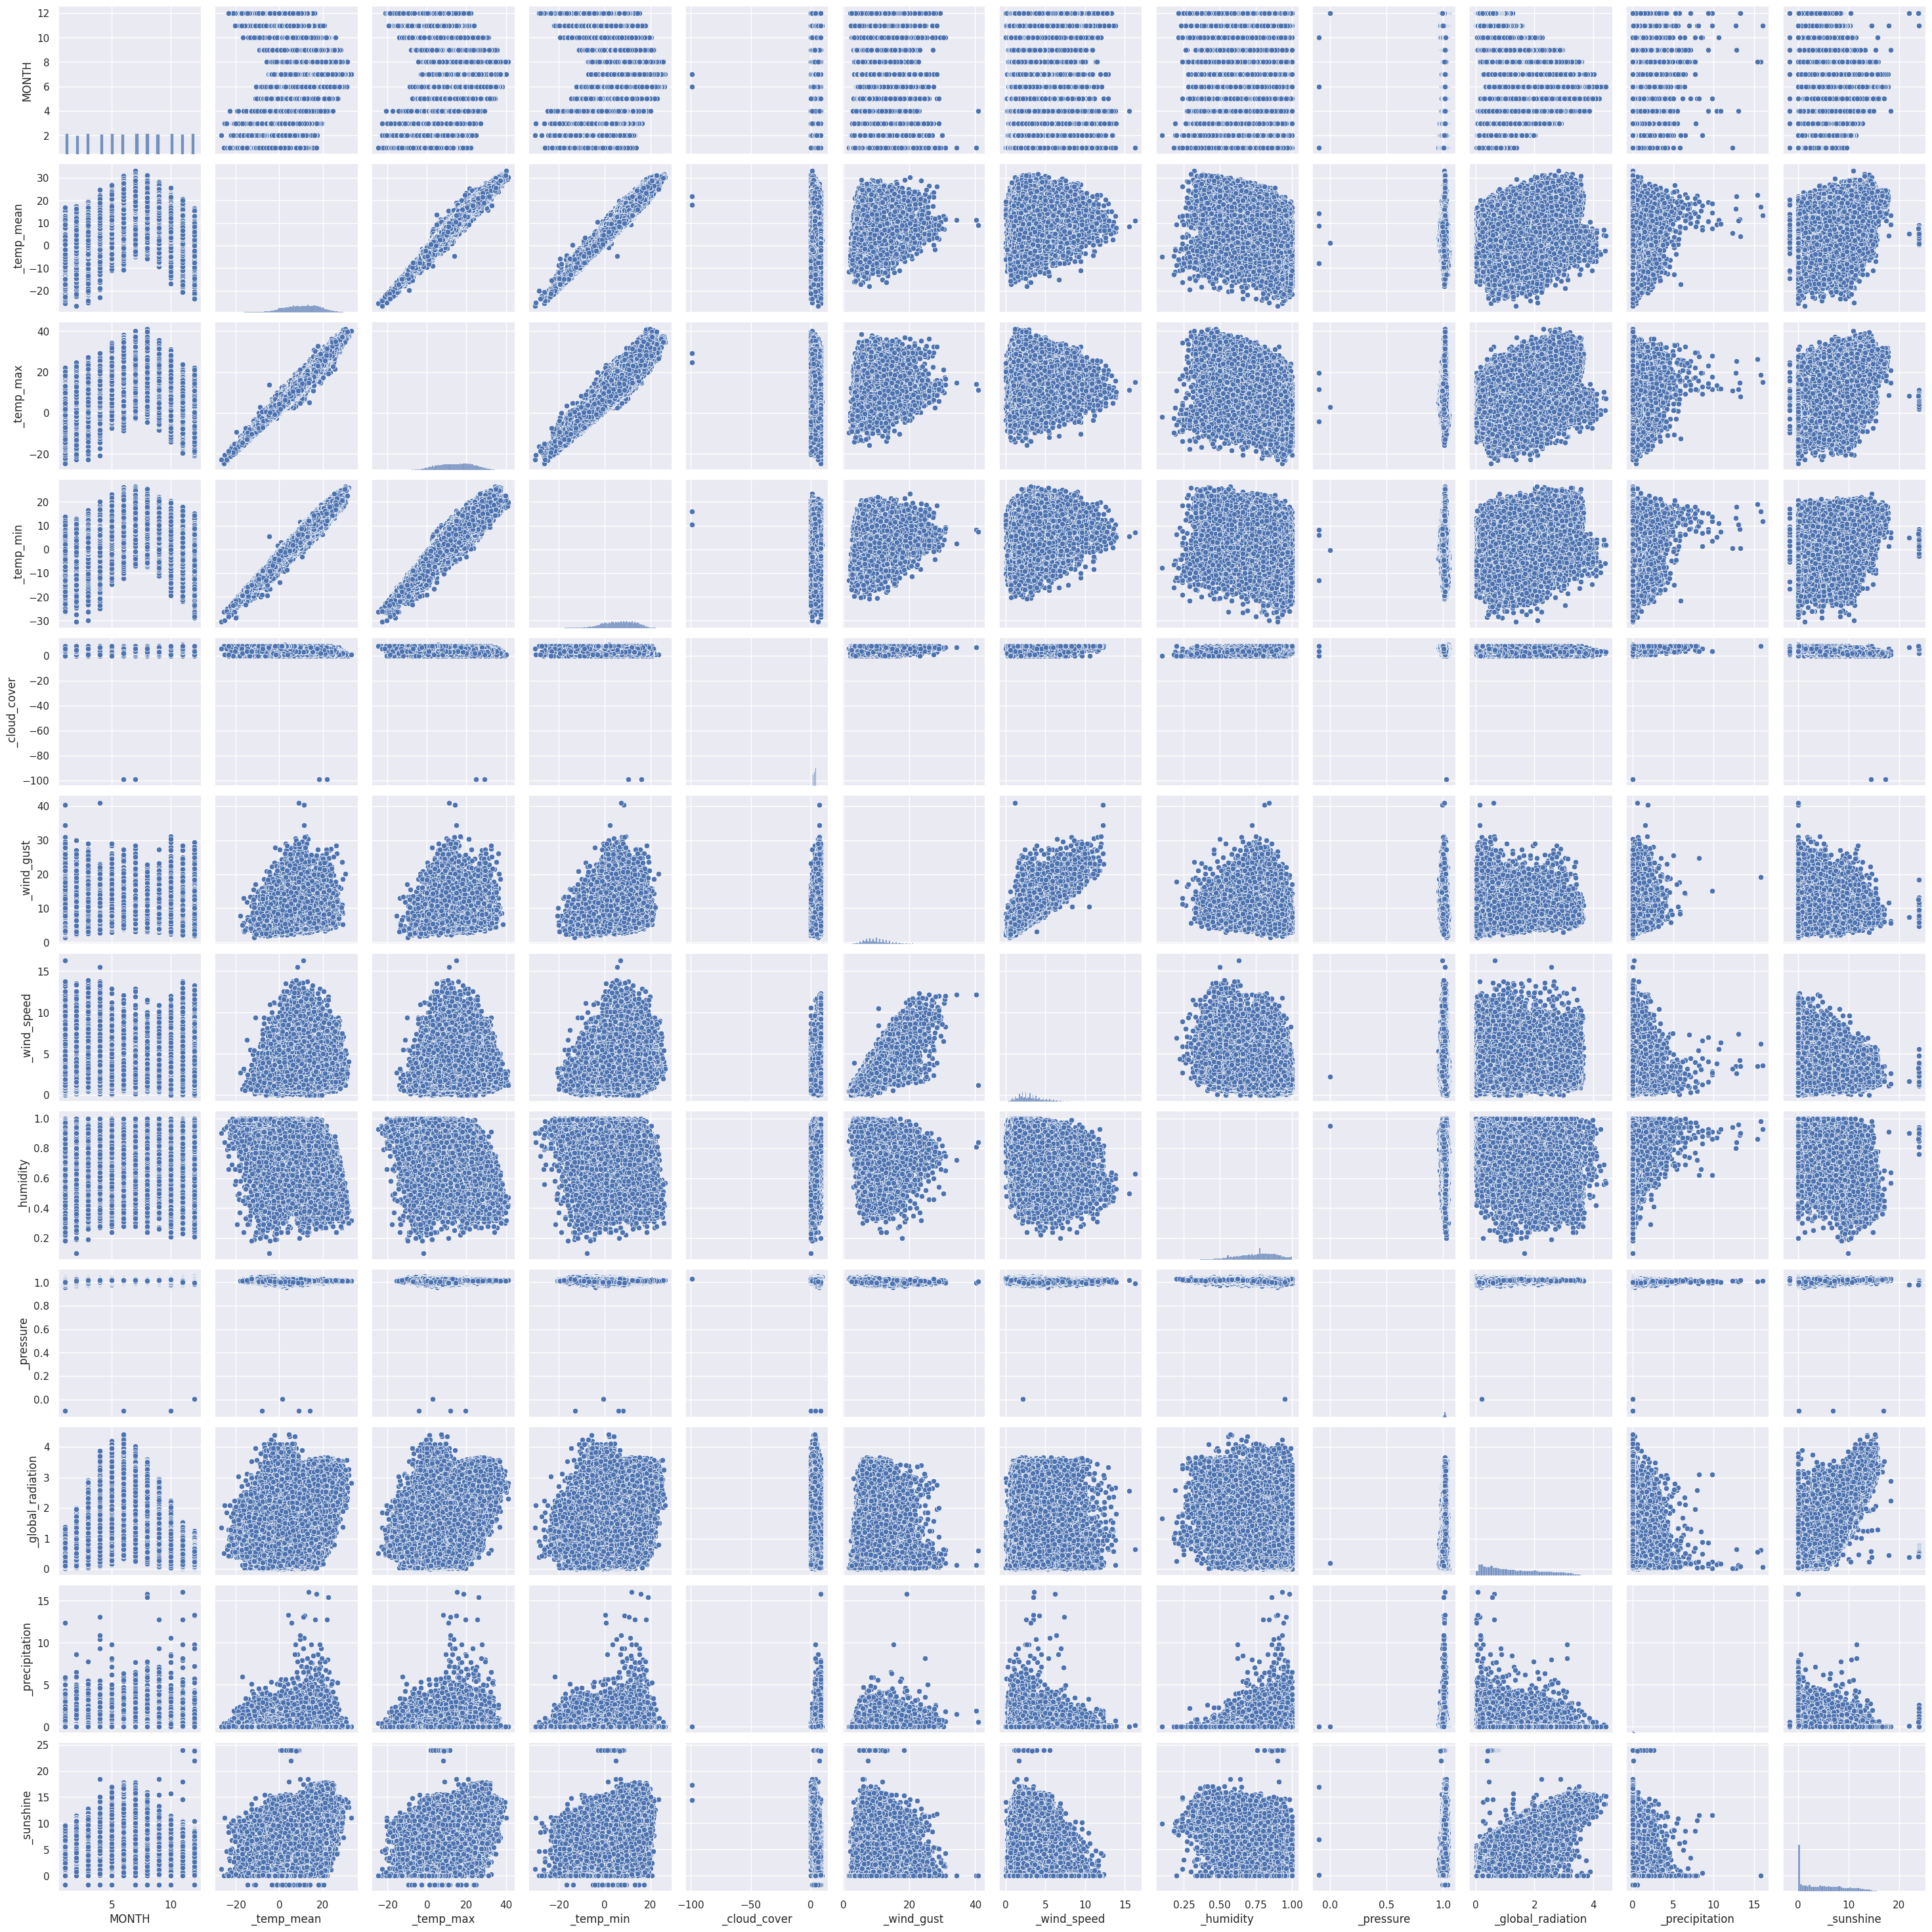

In [ ]:
sns.pairplot(data = climate[['MONTH'] + columns])
plt.show()
plt.close()

De maneira geral, os gráficos podem ser interpretados como uma manifestação da relação física entre as variáveis climáticas avaliadas. Por exemplo, existe uma forte correlação positiva entre os atributos referentes à temperatura - mínima, máxima e média -, o que é uma consequência natural de sua definição. Também é possível observar uma razoável flutuação nas grandezas em função dos diferentes meses, o que possivelmente indica as variações no clima das cidades conforme a passagem das estações do ano. Nos meses centrais (por volta de Junho, Julho), as médias de temperatura são mais elevadas, assim como a radiação global e as horas de luz solar, o que provavalmente é uma consequência do verão (as cidades estão presentes no hemisfério norte). Há uma pequena correlação positiva entre o índice de rajadas de vento e sua velocidade, o que também é naturalmente esperado, assim como entre horas de luz solar e radiação global, e humidade e precipitação. Essas mesmas manifestações físicas também podem ser observadas no sentido negativo entre alguns outros atributos. Ademais, a grande maioria não apresenta uma correlação forte em nenhum sentido.

A seguir, tem-se uma plotagem inicial dos dados em um espaço bidimensional por meio da técnica de PCA ("Principal Component Analysis"), a qual projeta o espaço n-dimensional original nas direções que maximizam a variância entre os pontos. O eixo X e o eixo Y dizem respeito às duas primeiras componentes principais, enquanto a coloração ("hue") representa a terceira. A ideia é obter uma noção mais profunda da disposição espacial e do formato dos dados, o que pode colaborar com a escolha de algoritmos e com o ajuste de parâmetros. (As entradas com valores faltantes foram removidas para efeito de plotagem).

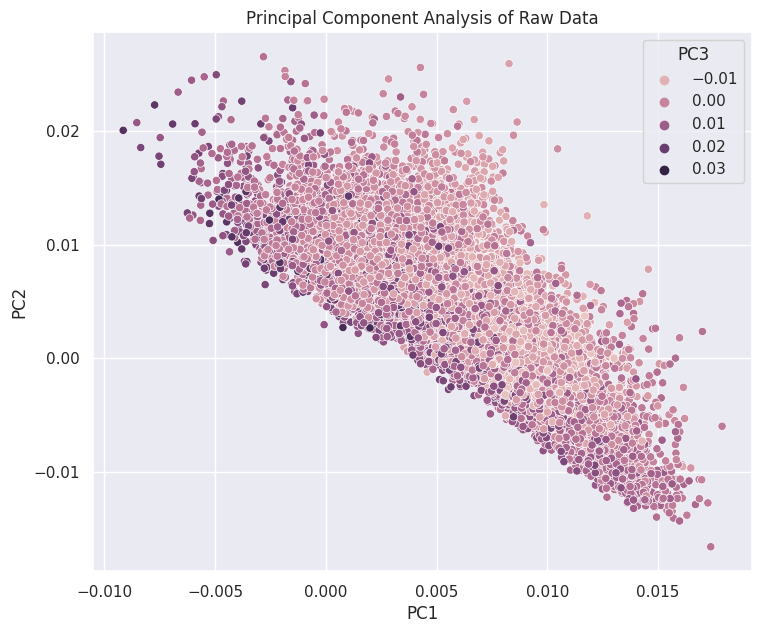

In [ ]:
pca = PCA(n_components = 3)
pca.fit(np.transpose(climate[['MONTH'] + columns].dropna().to_numpy()))

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(8.5, 7)
sns.scatterplot(x = pca.components_[0], y = pca.components_[1], hue = pca.components_[2], ax = axs)
axs.set_xlabel('PC1')
axs.set_ylabel('PC2')
axs.legend(title = 'PC3')
axs.set_title('Principal Component Analysis of Raw Data')
plt.show()
plt.close()

De imediato, não é possível observar nenhuma formação ou comportamento em grupo entre as várias instâncias. Os dados estão em alguma medida seguindo uma tendência ligeiramente linear em um sentido negativo, mas nada exacerbante, sendo sua disposição, em essência, uma formação homogênea em torno do centro de massa.

Uma questão fundamental na análise de uma base de dados diz respeito a ruídos ou a lacunas. No caso, como mencionado previamente, a base escolhida não apresenta nenhum dado faltante, o que é, em um primeiro momento, uma característica extremamente positiva. Entretanto, após uma análise mais rigorosa, observa-se que, retomando o formato original da base, algumas cidades não apresentam as 11 colunas referentes a cada atributo climático. Em outras palavras, cada cidade apresenta dados completos para cada uma das colunas que possui, mas algumas não contém todas. Um exemplo seria a cidade "BASEL", a qual não possui colunas para os atributos "_wind_gust" e "_wind_speed". Após a reorganização dos dados, essas lacunas se tornaram visíveis, já que, quando ausentes, o espaço na base foi preenchido com valores nulos ("NaN"), conforme o modelo de formatação proposto previamente. A seguir, tem-se a contagem do número de entradas com valores faltantes para cada um dos 11 atributos, assim como as colunas não contempladas nos dados relativos a cada uma das 17 cidades.

In [ ]:
climate.isna().sum()

DATE                     0
CITY                     0
MONTH                    0
_temp_mean               0
_temp_max                0
_temp_min             3654
_cloud_cover         18270
_wind_gust           36540
_wind_speed          18270
_humidity             7308
_pressure            10962
_global_radiation     7308
_precipitation           0
_sunshine            14616
dtype: int64

In [ ]:
# Computes missing columns for each city.
missing_columns = {}
for city in cities:
  missing_columns[city] = list(climate.columns[climate[climate['CITY'] == city].isna().sum().astype('bool')])
  print(city + ": " + str(missing_columns[city]))

BASEL: ['_wind_gust', '_wind_speed']
BUDAPEST: ['_temp_min', '_wind_gust', '_wind_speed']
DE_BILT: []
DRESDEN: ['_pressure']
DUSSELDORF: []
HEATHROW: ['_wind_gust', '_wind_speed']
KASSEL: ['_cloud_cover']
LJUBLJANA: ['_wind_gust']
MAASTRICHT: []
MALMO: ['_cloud_cover', '_wind_gust', '_humidity', '_pressure', '_global_radiation', '_sunshine']
MONTELIMAR: ['_cloud_cover', '_wind_gust', '_sunshine']
MUENCHEN: []
OSLO: []
PERPIGNAN: ['_cloud_cover', '_wind_gust', '_sunshine']
SONNBLICK: ['_wind_gust', '_wind_speed', '_pressure']
STOCKHOLM: ['_wind_gust', '_wind_speed', '_humidity', '_global_radiation']
TOURS: ['_cloud_cover', '_wind_gust', '_sunshine']


Esses resultados mostram que, de fato, considerando todos os 11 atributos, há diversas entradas com valores ausentes. Um destaque seria a cidade "MALMO", a qual contém informações para apenas 5 das 11 colunas. No geral, entretanto, a maioria das cidades apresenta dados relativos à maioria dos atributos, o que não causa tantos prejuízos ao estudo.

A base de dados referente à classificação de cada entrada não apresenta nenhum dado faltante e, portanto, é bem definida e preparada para uso (o que pode ser observado nos snippets de código a seguir). Uma análise interessante que pode ser feita sobre ela diz respeito ao balanço entre ambas as classes, sendo a positiva relativa a um dia adequado para um piquenique e a negativa, um inadequado. No gráfico abaixo, o qual plota em formato de histograma as contagens para cada rótulo, é possível notar que, infelizmente, não há um balanco muito adequado, com a quantidade de entradas negativas totalizando pouco mais do dobro da quantidade de entradas positivas. Por mais que não seja uma situação ótima, também não é esperado que o impacto dessa característica seja acentuado.

In [ ]:
labels.shape

(62118, 3)

In [ ]:
labels.head()

DATE   CITY  _picnic_weather
0  20000101  BASEL            False
1  20000102  BASEL            False
2  20000103  BASEL            False
3  20000104  BASEL            False
4  20000105  BASEL            False

In [ ]:
labels.isna().sum()

DATE               0
CITY               0
_picnic_weather    0
dtype: int64

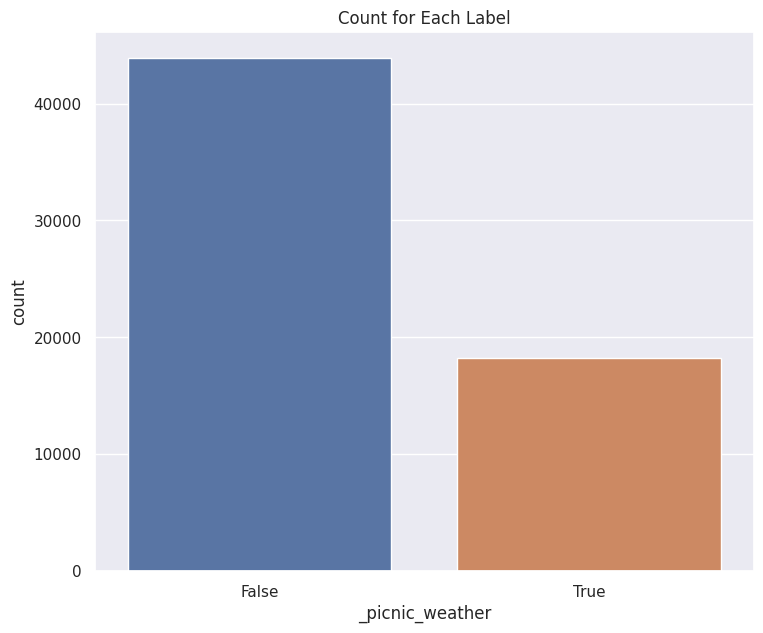

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(8.5, 7)
sns.countplot(data = labels, x = '_picnic_weather', ax = axs)
axs.set_title('Count for Each Label')
plt.show()
plt.close()

## **Preparação dos Dados**

A base de dados, após a reestruturação realizada na seção anterior, conta com 62118 entradas. Cada uma diz respeito ao clima de uma localidade em um determinado dia e é caracterizada por 14 diferentes atributos. Destes, foram escolhidos para fins de aprendizagem os seguintes: "MONTH", "_temp_mean", "_temp_max", "_temp_min", "_cloud_cover", "_wind_gust", "_wind_speed", "_humidity", "_pressure", "_global_radiation", "_precipitation", "_sunshine". Com exceção do primeiro, os demais representam diversas características climáticas, todas julgadas relevantes para fins de previsão do tempo. A variável relativa ao mês, por sua vez, também foi mantida tendo em vista a contemplação de conhecimentos da temporalidade dos dados, isto é, a captura da variação dos demais atributos meteorológicos em função da passagem do tempo. Pensa-se que conhecimentos importantes para fins de previsão também estão concentrados na época à qual os dados se referem, sendo essa dimensão manifestada em alguma medida pelo atributo "MONTH".

In [ ]:
columns = ['MONTH', '_temp_mean', '_temp_max', '_temp_min', '_cloud_cover', '_wind_gust', '_wind_speed', '_humidity', '_pressure', '_global_radiation', '_precipitation', '_sunshine']

A principal questão levantada na etapa de entendimento dos dados foi o fato de algumas cidades não apresentarem informações relativas a todos os atributos climáticos. Uma possível solução para esse problema seria apenas remover as entradas com dados faltantes, já que há uma gama rica e diversa de diferentes variáveis meteorológicas sendo contempladas, de modo que, mesmo com uma pequena quantidade de amostras, pensa-se que um aprendizado razoável seja possível. Entretanto, uma dimensão que é perdida sob essa abordagem é a distribuição espacial das informações. Remover entradas com dados faltantes levaria à perda total de qualquer dado relativo a algumas cidades. Em específico, apenas 5 das 17 estão totalmente completas, ou seja, a maior parte da base seria descartada.

Aqui, surgem dois pontos de ponderação. O primeiro diz respeito àquilo abordado de maneira breve na introdução do trabalho: a generalidade do modelo contra sua especifidade em termos de localização. Em particular, treinar o algoritmo com dados relativos a diferentes locais potencialmente geraria uma previsão mais robusta, porém ao custo de uma menor especificidade, enquanto que o treinamento particular a cada cidade levaria a uma maior adaptação a suas peculiaridades, gerando previsões locais mais precisas, porém ao custo de uma generalização irregular. A segunda questão, por sua vez, trabalha com o equilíbrio entre volume e riqueza de dados. Como mencionado, uma abordagem para o tratamento das lacunas seria a manutenção de todos os atributos e a remoção de entradas ruidosas, o que levaria a um menor volume de dados mais complexos. Por outro lado, também há a possibilidade de selecionar um subconjunto de colunas para as quais mais cidades possuam dados completos, o que levaria a uma maior quantidade de informações menos diversificadas.

A abordagem que será efetivamente adotada, entretanto, segue um caminho diferente. Dado que há uma grande heterogeneidade na completude das informações referentes às várias variáveis climáticas, um modelo de regressão linear será treinado para prever e completar as lacunas, de modo a reconstruir a base de dados de maneira completa. Aqui, tem-se em mente um modelo mais robusto, com uma menor tendência a uma superadaptação aos dados de treino, já que informações desconhecidas serão estimadas e, portanto, há prudência em uma abordagem mais conservativa. Nesse sentido, será utilizado o algoritmo de regressão "Lasso", o qual apresenta um termo de regularização da norma dos coeficientes lineares controlado por um parâmetro alpha. Esse termo minimiza a superadaptação e gera um modelo mais robusto, ao custo de um erro maior (no caso, a soma dos erros quadrados).

A fim de se avaliar a escolha de tal parâmetro, experimentos foram realizados com relação aos dados completos. Uma dificuldade da reconstrução de informações inexistentes é justamente que não existe uma maneira de avaliar a qualidade do modelo quanto a elas, já que os valores reais são totalmente desconhecidos. Assume-se como premissa, portanto, que os dados como um todo são de alguma forma consistentes e similares, o que permite a validação da reconstrução com base neles mesmos.

Nesse sentido, para cada cidade na base de dados com alguma coluna faltanto, um modelo de regressão linear foi treinado com o restante das informações (filtrando-se aquelas efetivamente completas). As variáveis dependentes consistem nas colunas ausentes, enquanto as variáveis independentes consistem nas demais. Para cada cidade e para cada variável dependente, o modelo foi treinado para diferentes valores de alpha e algumas métricas foram computadas, sendo elas a norma L2 do vetor de pesos (||w||^2), o erro quadrático médio (MSE) e a soma dos erros quadráticos (SSE, a qual foi aproximada pela média multiplicada pela quantidade de entradas), sendo estas duas últimas calculadas sobre os dados de treino. Os resultados foram organizados em uma nova base de dados, na qual cada entrada consiste no modelo para um atributo faltante de uma cidade. Em seguida, um processo de agregação foi realizado, produzindo uma tabela que apresenta os valores médios dessas métricas para cada valor de alpha.

In [ ]:
# Computes different metrics in regard to training data.
climate_aux = climate.copy()
results = pd.DataFrame(columns = ['city', 'variable', 'alpha', '||w||^2', 'MSE', 'SSE'])
for a in [0, 0.01, 0.1, 1, 10, 100, 1000]:
  # Reconstructs the missing values on the database.
  for city in cities:
    # Filters the database according to "to-be-predicted" variable.
    independent_variables = [var for var in columns if var not in missing_columns[city]]
    dependent_variables = missing_columns[city]
    test = climate_aux[climate_aux['CITY'] == city].copy()
    training = climate_aux[climate_aux['CITY'] != city].dropna()

    # Trains a linear regression model to predict missing values.
    for dependent_variable in dependent_variables:
      model = Ridge(alpha = a)
      model.fit(training[independent_variables], training[dependent_variable])
      result = {}
      result['city'] = city
      result['variable'] = dependent_variable
      result['alpha'] = a
      result['||w||^2'] = np.linalg.norm(model.coef_, 2)
      result['MSE'] = mean_squared_error(training[dependent_variable], np.around(model.predict(training[independent_variables])))
      result['SSE'] = training[dependent_variable].shape[0] * mean_squared_error(training[dependent_variable], np.around(model.predict(training[independent_variables])))
      results = pd.concat([results, pd.DataFrame(result, index = [0], columns = results.columns)], ignore_index = True)

In [ ]:
results

city           variable alpha    ||w||^2        MSE          SSE
0        BASEL         _wind_gust     0  92.810174  11.574962  211474.5500
1        BASEL        _wind_speed     0  28.118460   2.209658   40370.4500
2     BUDAPEST          _temp_min     0   8.670929   1.739745   31785.1400
3     BUDAPEST         _wind_gust     0  93.622871  11.597195  211880.7500
4     BUDAPEST        _wind_speed     0  28.270384   2.211015   40395.2500
..         ...                ...   ...        ...        ...          ...
219  STOCKHOLM          _humidity  1000   0.028434   0.070768    1292.9385
220  STOCKHOLM  _global_radiation  1000   0.168887   0.201388    3679.3574
221      TOURS       _cloud_cover  1000   1.229743   2.258019   41254.0000
222      TOURS         _wind_gust  1000   2.198527   4.618903   84387.3500
223      TOURS          _sunshine  1000   3.388356   4.010111   73264.7200

[224 rows x 6 columns]

In [ ]:
# Computes the mean values for metrics in regard to each alpha.
mean_results = pd.DataFrame(columns = ['alpha', '||w||^2', 'MSE', 'SSE'])
for a in [0, 0.01, 0.1, 1, 10, 100, 1000]:
  mean_result = results[results['alpha'] == a][['alpha', '||w||^2', 'MSE', 'SSE']].mean()
  mean_results = pd.concat([mean_results, mean_result.to_frame(1).T], ignore_index = True)

In [ ]:
mean_results

alpha    ||w||^2       MSE           SSE
0     0.00  27.417771  3.892113  71108.903102
1     0.01  27.250128  3.892107  71108.802477
2     0.10  25.833338  3.892314  71112.569352
3     1.00  17.204585  3.911023  71454.381852
4    10.00   5.486187  3.995242  72993.063102
5   100.00   2.652737  4.062667  74224.929977
6  1000.00   1.382054  4.198602  76708.456227

In [ ]:
del climate_aux, results, mean_results

A partir dos resultados, é possível observar o compromisso existente no termo de normalização da regressão Lasso. Em particular, nota-se que, conforme o valor de alpha aumenta, a norma do vetor de pesos é reduzida - o que manifesta um modelo mais robusto, com uma menor variância mas potencialmente algum viés - e os erros quadráticos médio e total aumentam - indicando uma menor adaptação aos dados de treino ou uma pior aproximação. Na tabela de agregação, verifica-se que, para um valor de alpha igual a 1, há uma redução razoável na norma dos pesos (+-10), enquanto o erro quadrático médio não varia tanto (+-0.01). Para valores menores, a redução na norma não é significativa (+-2) e, para valores maiores, o aumento no erro médio é mais substancial (+-0.1). Dessa forma, 1 foi definido como o valor do parâmetro a ser utilizado, sendo a reconstrução da base de dados original em si realizada a seguir.

In [ ]:
# Reconstructs the missing values on the database.
for city in cities:
  # Filters the database according to "to-be-predicted" variable.
  independent_variables = [var for var in columns if var not in missing_columns[city]]
  dependent_variables = missing_columns[city]
  test = climate[climate['CITY'] == city].copy()
  training = climate[climate['CITY'] != city].dropna()

  # Trains a linear regression model to predict missing values.
  for dependent_variable in dependent_variables:
    model = Ridge(alpha = 1.0)
    model.fit(training[independent_variables], training[dependent_variable])
    climate.loc[climate['CITY'] == city, dependent_variable] = np.around(model.predict(test[independent_variables]), decimals = 1)

In [ ]:
climate.head()

DATE   CITY  MONTH  _temp_mean  _temp_max  _temp_min  _cloud_cover  \
0  20000101  BASEL      1         2.9        3.9        1.6           8.0   
1  20000102  BASEL      1         3.6        4.8        2.7           8.0   
2  20000103  BASEL      1         2.2        4.8        0.1           5.0   
3  20000104  BASEL      1         3.9        7.5        0.5           7.0   
4  20000105  BASEL      1         6.0        8.6        3.8           5.0   

   _wind_gust  _wind_speed  _humidity  _pressure  _global_radiation  \
0         9.9          4.0       0.89     1.0286               0.20   
1         9.9          4.0       0.87     1.0318               0.25   
2         9.5          3.7       0.81     1.0314               0.50   
3        10.2          3.6       0.79     1.0262               0.63   
4         9.4          3.8       0.90     1.0246               0.51   

   _precipitation  _sunshine  
0            0.03        0.0  
1            0.00        0.0  
2            0.00        3.7  
3            0.35        6.9  
4            0.07        3.7

In [ ]:
climate.isna().sum()

DATE                 0
CITY                 0
MONTH                0
_temp_mean           0
_temp_max            0
_temp_min            0
_cloud_cover         0
_wind_gust           0
_wind_speed          0
_humidity            0
_pressure            0
_global_radiation    0
_precipitation       0
_sunshine            0
dtype: int64

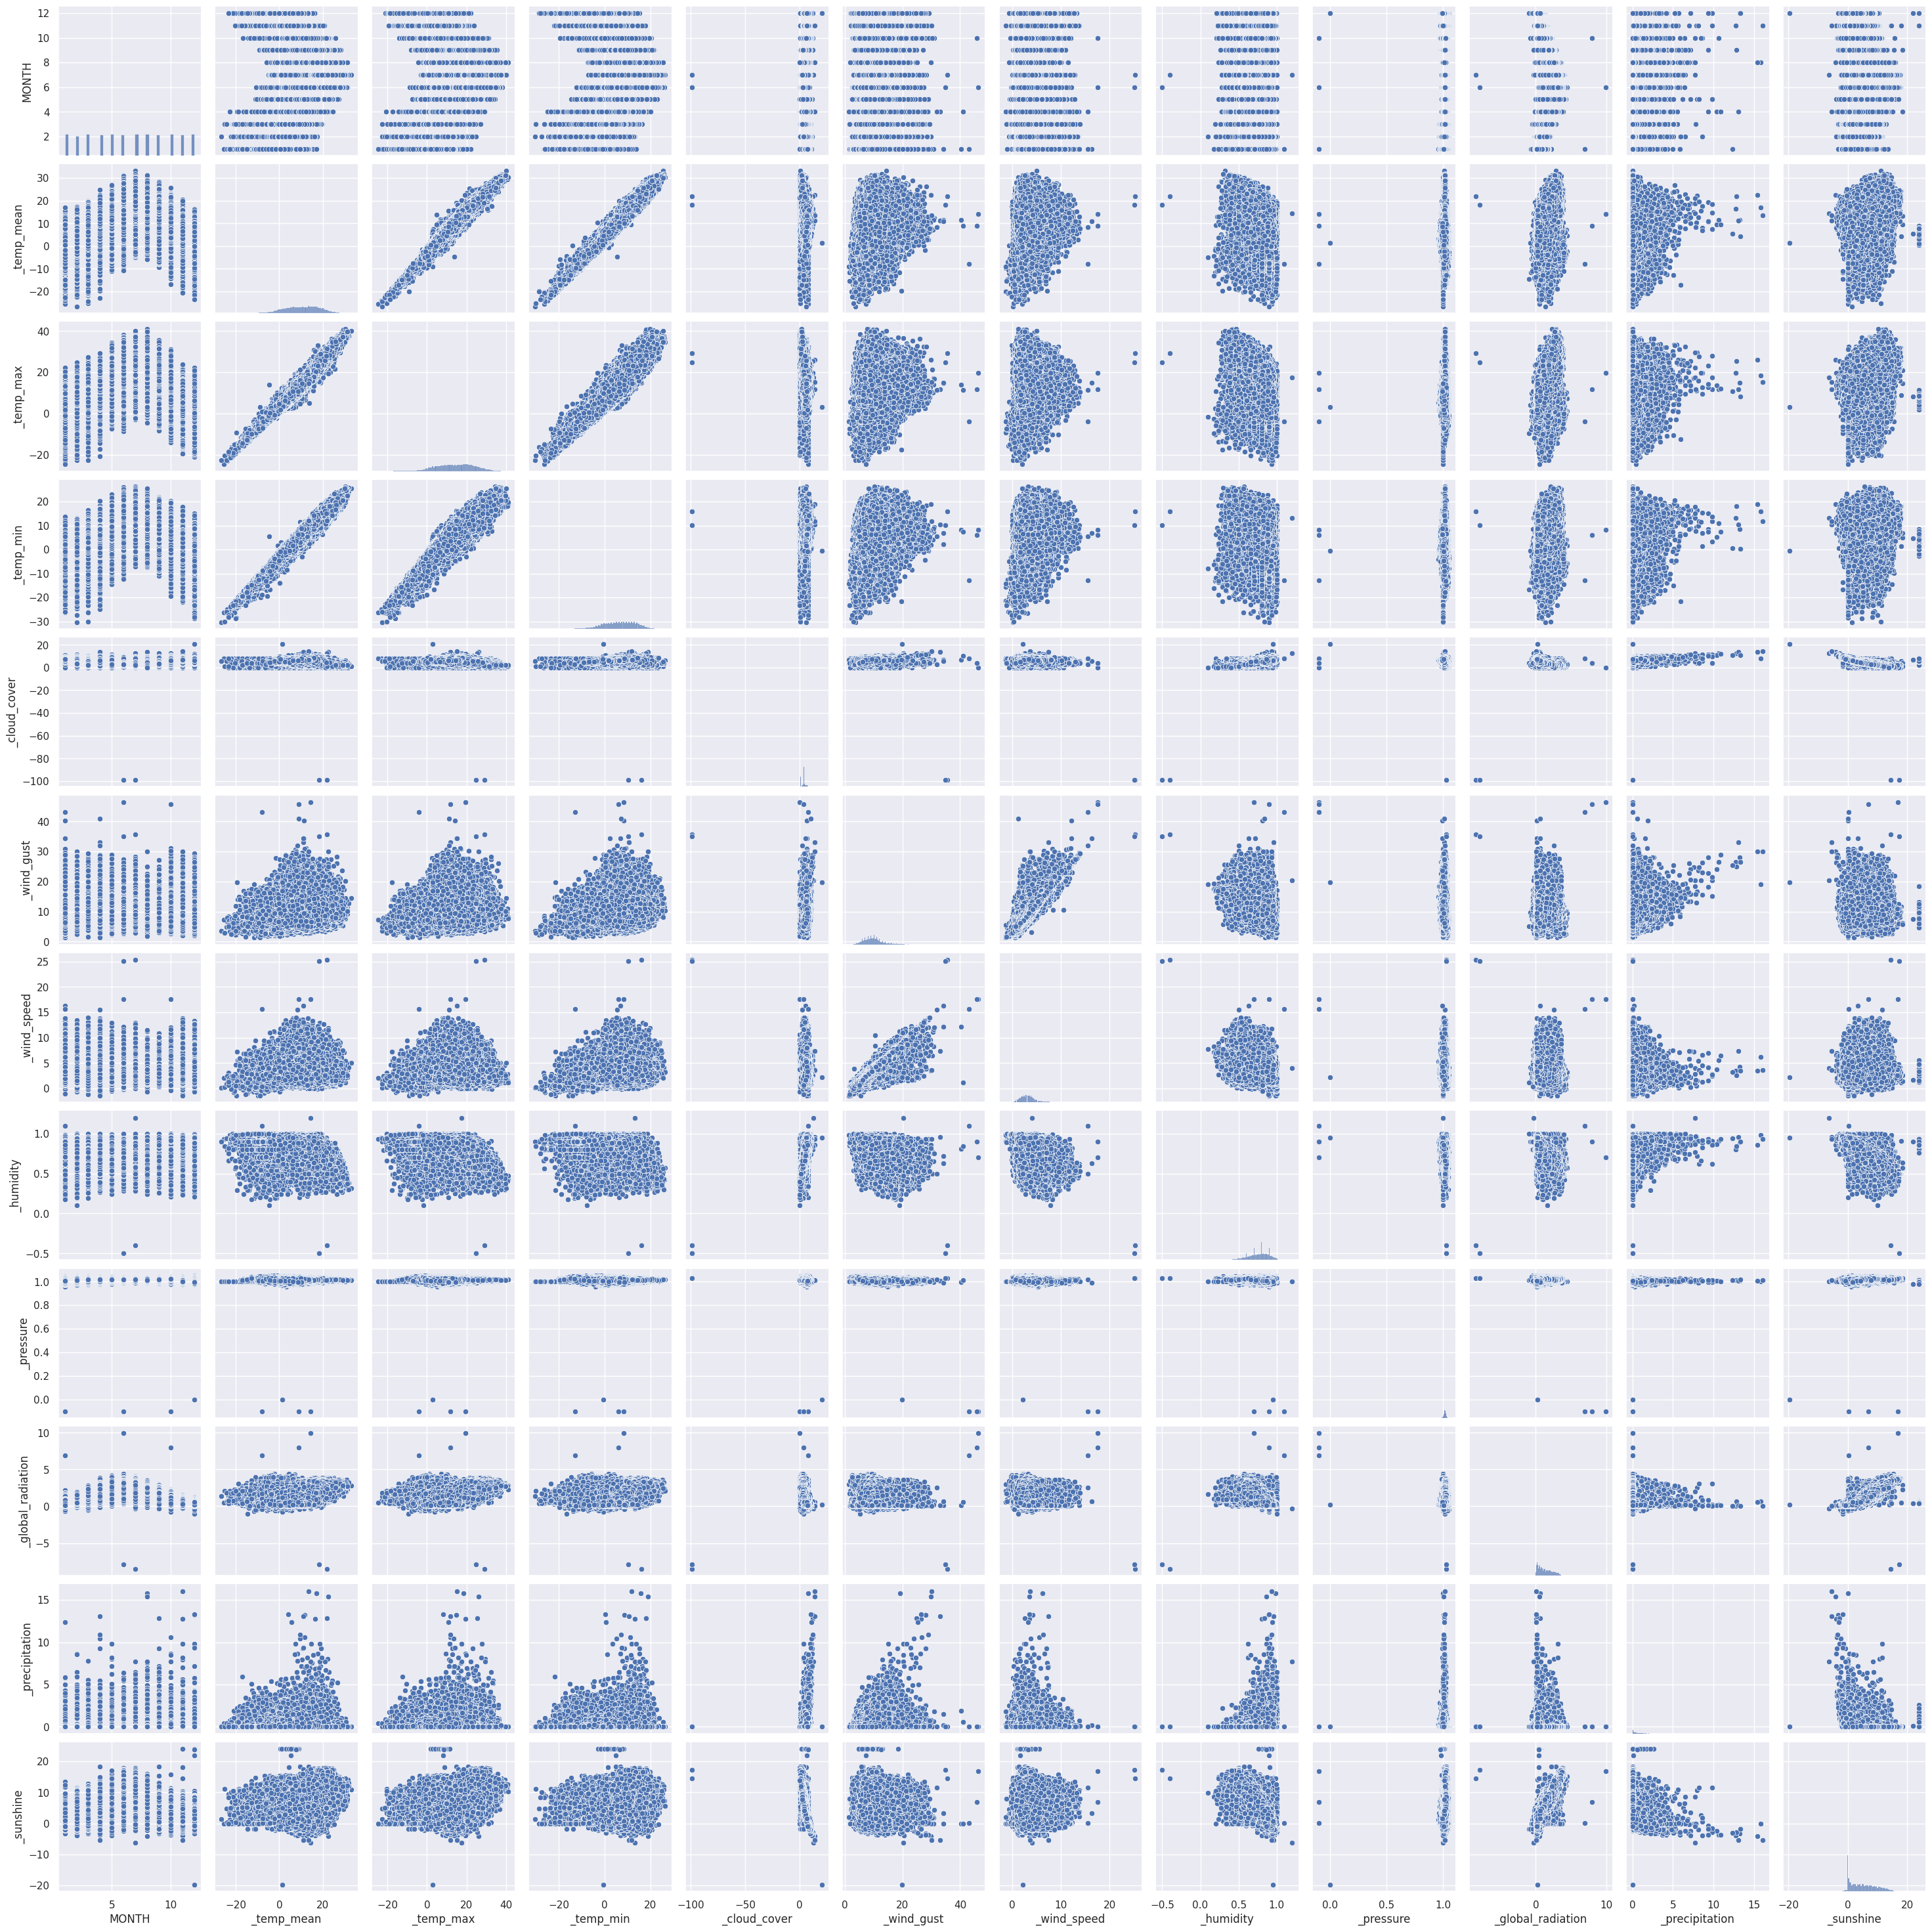

In [ ]:
sns.pairplot(data = climate[columns])
plt.show()
plt.close()

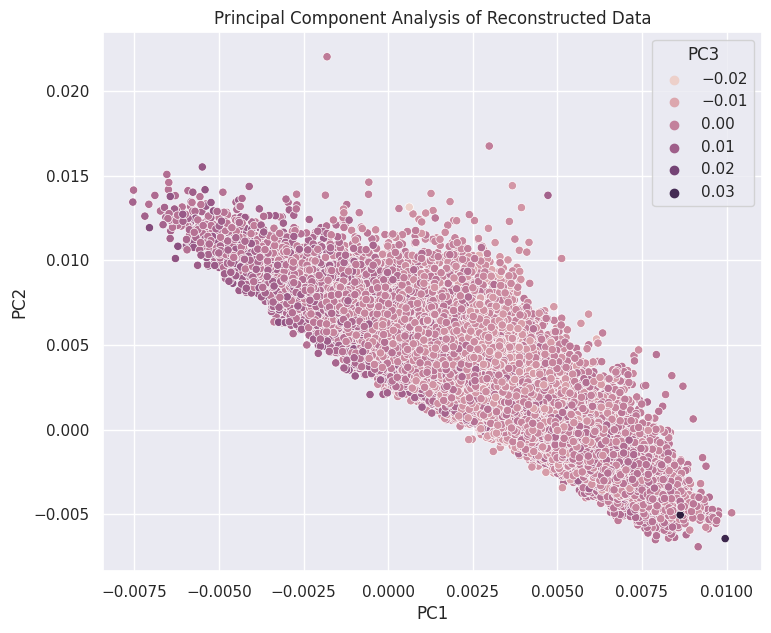

In [ ]:
pca = PCA(n_components = 3)
pca.fit(np.transpose(climate[columns].to_numpy()))

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(8.5, 7)
sns.scatterplot(x = pca.components_[0], y = pca.components_[1], hue = pca.components_[2], ax = axs)
axs.set_xlabel('PC1')
axs.set_ylabel('PC2')
axs.legend(title = 'PC3')
axs.set_title('Principal Component Analysis of Reconstructed Data')
plt.show()
plt.close()

A partir das visualizações geradas para a base de dados reconstruída completa (PairPlot e gráfico bidimensional via PCA), é possível observar que não há grandes disparidades com relação àquelas produzidas na etapa de entendimento dos dados (durante a qual as entradas com valores faltantes foram simplesmente descartadas para fins de plotagem). Esse resultado pode ser interpretado de duas formas. Por um lado, isso é um aspecto positivo, já que indica que o modelo de regressão foi consistente com os dados de treino e foi robusto quanto à previsão sobre os dados de teste, reconstruindo informações uniformes com o núcleo do conhecimento. Por outro, disparidades potencialmente existentes nos dados reais (os quais são desconhecidos) são totalmente perdidas - ou melhor, não é possível as reconstruir apenas com as informações em posse -, o que pode gerar alguma lacuna no aprendizado e, consequentemente, prejuízos em termos práticos de previsão.

Finalmente, os dados são divididos entre as porções de treinamento e de testes. Para tal, a ordenação da base foi randomizada e as 80% primeiras entradas foram reservadas para treino, enquanto as últimas 20% foram dedicadas para fins de validação.

In [ ]:
# Unites the data and the labels.
climate['_picnic_weather'] = labels['_picnic_weather']

# Shuffles dataframe rows.
climate_aux = climate.sample(frac = 1)

# Separates training and testing portions.
index = int(0.8 * climate_aux.shape[0])
climate_training = climate_aux.copy()
climate_training = climate_training.drop(climate_training.index[index:climate_training.shape[0]])
climate_test = climate_aux.copy()
climate_test = climate_test.drop(climate_test.index[0:index])

del climate_aux, labels

## **Modelagem**

O modelo adotado para a tarefa de regressão foi um "Multi-layer Perceptron" (MLP), uma rede neural simples baseada em camadas que estimam por um processo de "feed-forward" e aprendem via "backwards propagation". A topologia é baseada em duas camadas fixas, uma de entrada e outra de saída, intermediadas por um número arbitrário de camadas "escondidas" de tamanho também subjetivo. A escolha por esse algoritmo foi um fruto principalmente de sua flexibilidade. A depender da escolha de parâmetros, seu comportamento se reduz a uma regressão logística convencional, mas ainda é possível refinar de maneira mais profunda seu aprendizado. No caso, tendo em vista que o objetivo da modelagem é uma tarefa de classificação binária, foi adotada uma sigmóide como função de ativação na camada de output. Nas camadas intermediárias, a função utilizada é a "ReLU", enquanto que na camada de input, a função identidade. A otimização do modelo é baseada em uma abordagem de gradiente descendente estocástico, realizado em "minibatches" de 200 entradas cada. A função de erro otimizada é a "cross-entropy". A taxa de aprendizado escolhida foi 0.001 (o padrão da biblioteca SciKit Learn), e o procedimento para quando o número máximo de iterações for atingido, sendo a taxa mantida constante durante todo o processamento. Nesse momento, nenhuma forma de normalização foi adotada (parâmetro alpha igual a 0).

No caso, existem duas dimensões fundamentais a serem poderadas na construção de um MLP: a quantidade de neurônios por camada e a profundidade da porção escondida da rede. Em teoria, quanto maior o modelo, maior seria sua capacidade preditiva. A grande questão é que, a partir de certo momento, o custo computacional agregado a uma rede maior não compensa os pequenos ganhos advindos de sua expansão. A fim de se analisar esses compromissos, a seguir, são plotados dois gráficos da perda ("loss") de diferentes modelos em função do número de épocas de aprendizado. No primeiro, os modelos possuem apenas uma camada com quantidades crescentes de neurônios e, no segundo, a população neuronal é mantida fixa e a profundidade do sistema é variada. A ideia é achar o ponto ideal de equilíbrio entre complexidade e adequação aos dados, levando em conta o princípio de que um modelo mais simples e igualmente efetivo é preferível. Três rodadas foram realizadas para cada um dos dois experimentos, a fim de se capturar a randomicidade da otimização via gradiente descendente estocástico.

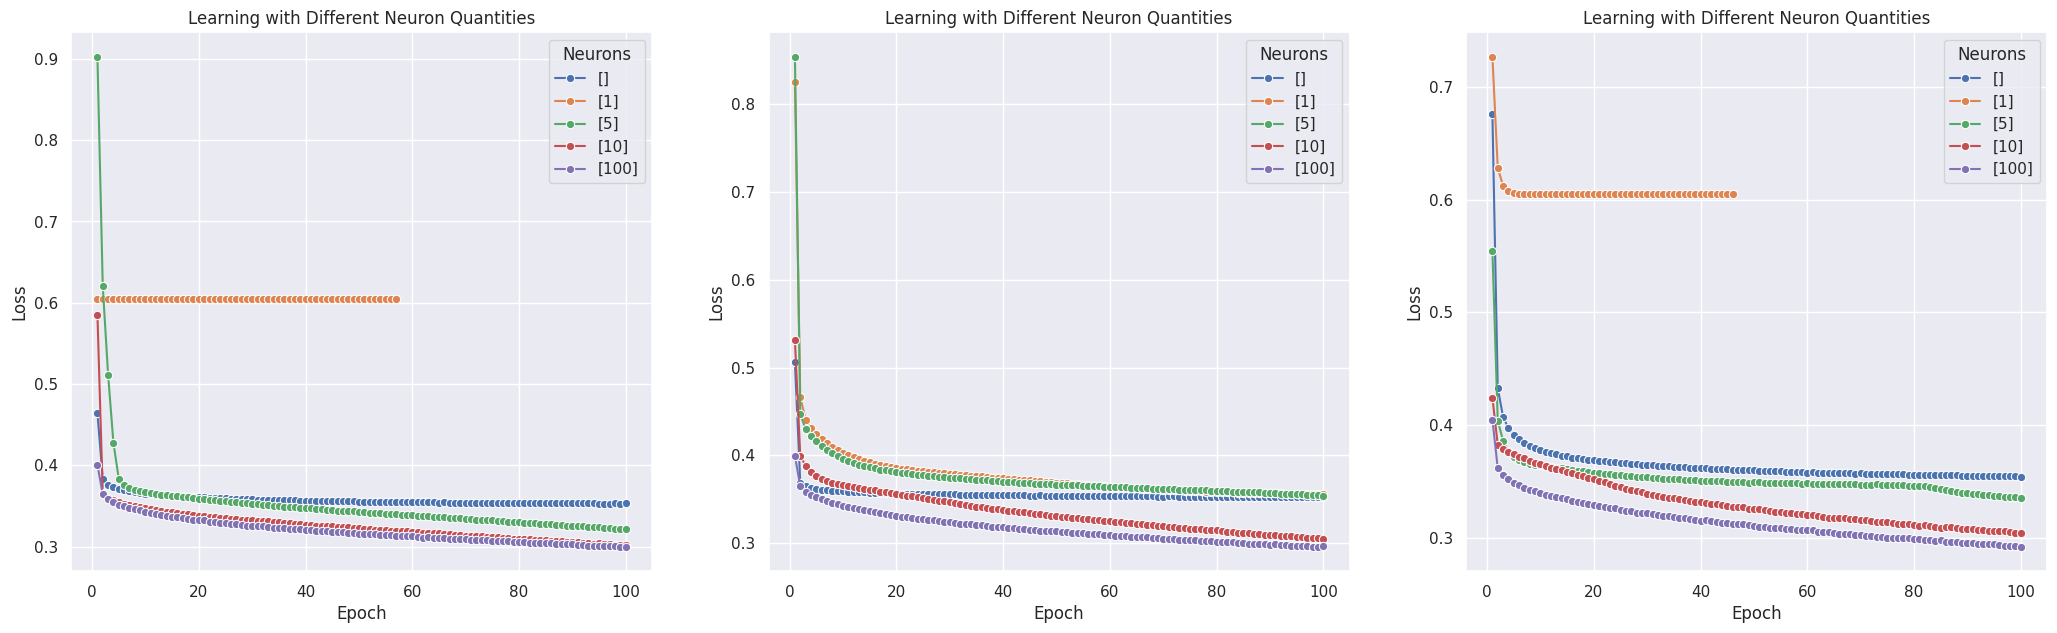

In [ ]:
# Layer size comparison.
fig, axs = plt.subplots(nrows = 1, ncols = 3)
fig.set_size_inches(25.5, 7)

for i in range(3):
  layers = [[], [1], [5], [10], [100]]
  for layer in layers:
    model = MLPClassifier(hidden_layer_sizes = layer, activation = 'relu', solver = 'sgd', alpha = 0, learning_rate_init = 0.001, max_iter = 100, tol = 0)
    model.fit(climate_training[columns], climate_training['_picnic_weather'])
    sns.lineplot(x = np.linspace(1, model.n_iter_, model.n_iter_), y = model.loss_curve_, marker = 'o', label = str(layer), ax = axs[i])

  axs[i].set_xlabel('Epoch')
  axs[i].set_ylabel('Loss')
  axs[i].set_title('Learning with Different Neuron Quantities')
  axs[i].legend(title = 'Neurons')

plt.show()
plt.close()

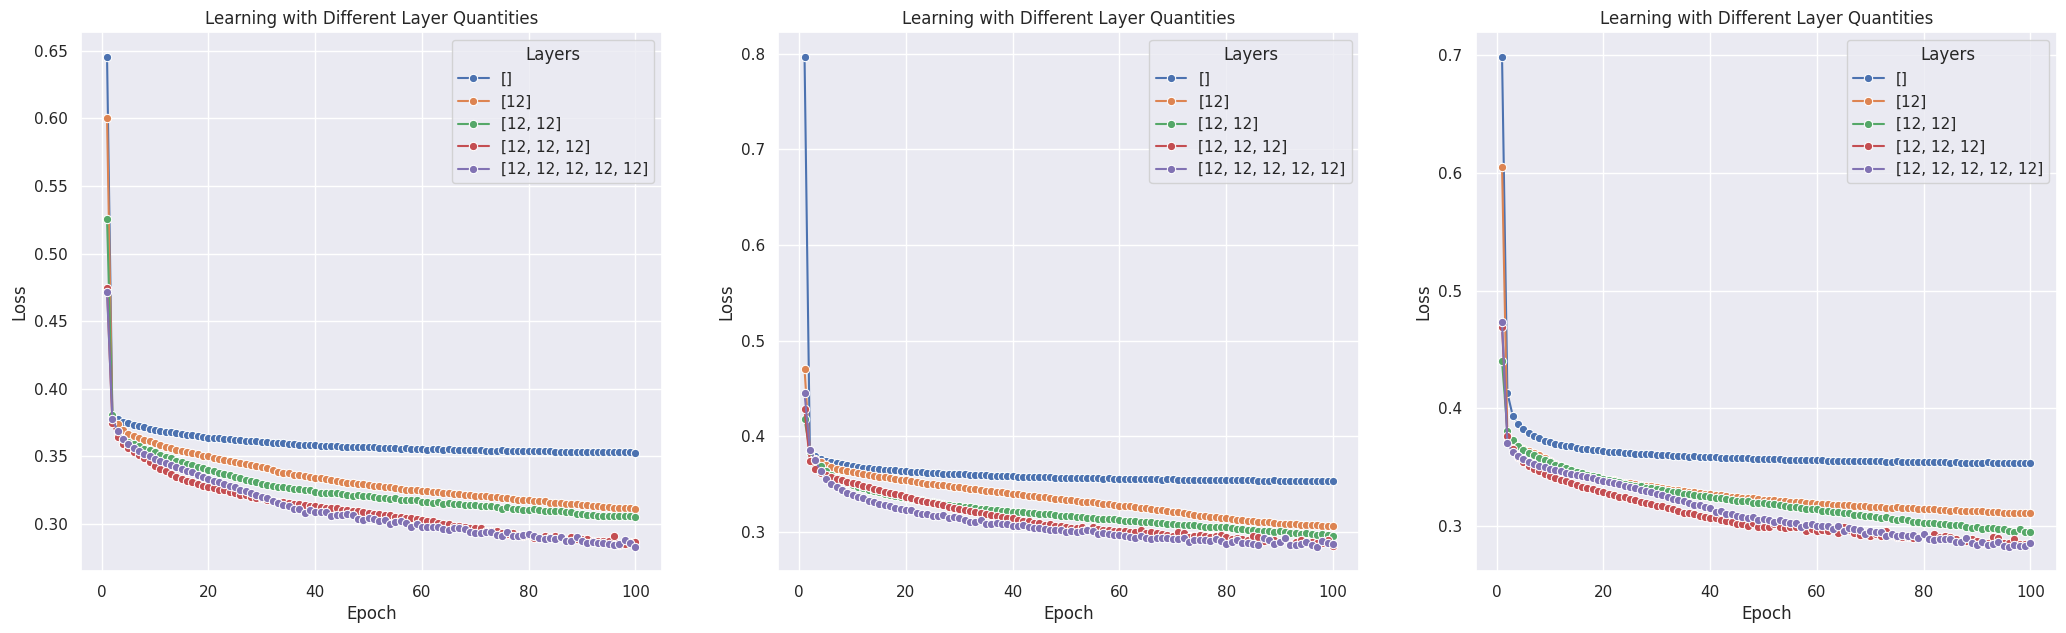

In [ ]:
# Network depth comparison.
fig, axs = plt.subplots(nrows = 1, ncols = 3)
fig.set_size_inches(25.5, 7)

for i in range(3):
  layers = [[], [12], [12, 12], [12, 12, 12], [12, 12, 12, 12, 12]]
  for layer in layers:
    model = MLPClassifier(hidden_layer_sizes = layer, activation = 'relu', solver = 'sgd', alpha = 0, learning_rate_init = 0.001, max_iter = 100, tol = 0)
    model.fit(climate_training[columns], climate_training['_picnic_weather'])
    sns.lineplot(x = np.linspace(1, model.n_iter_, model.n_iter_), y = model.loss_curve_, marker = 'o', label = str(layer), ax = axs[i])

  axs[i].set_xlabel('Epoch')
  axs[i].set_ylabel('Loss')
  axs[i].set_title('Learning with Different Layer Quantities')
  axs[i].legend(title = 'Layers')

plt.show()
plt.close()

Um detalhe interessante que pode ser observado nas visualizações geradas é justamente a comparação entre um modelo de regressão logística simples e uma pequena rede neural com algumas camadas. No caso, em ambos os experimentos, foi plotada uma curva (em azul) referente a um MLP com 0 camadas (ou, equivalentemente, um modelo de regressão logística), a fim de se analisar comparativamente seu comportamento com relação à adição de camadas e/ou de neurônios. Como esperado, as taxas de erros do modelo logístico começam mais baixas, na medida em que a adição de intermediários aumenta o tempo necessário para um aprendizado substancial. Entretanto, conforme a passagem de épocas, as redes começam a se desenvolver e capturar detalhes que não são identificáveis em um modelo logístico simples, apresentando melhoras aceleradas em sua taxa de acerto (ou reduções em sua perda).

Com relação à escolha de parâmetros, é possível observar que, de fato, o aumento da quantidade de neurônios ou do número de camadas não colabora substancialmente com a acurácia do modelo a partir de certo ponto. No primeiro caso, nota-se que a a função de perda do algoritmo não reduz significativamente a partir de 5 neurônios. Da mesma forma, no segundo caso, tal métrica altera insignificativamente a partir de 2 camadas. Nesse sentido, retomando a filosofia de escolha do modelo mais simples, a rede neural a ser construída para a predição do tempo será baseada em 2 camadas com 15 neurônios cada (foi observado que a quantidade de neurônios por camada apresentou um impacto um pouco mais significativo que a quantidade de camadas em si), estes parâmetros que foram escolhidos de maneira empírica com base nas análises anteriores. No total, serão realizadas 200 épocas de treinamento, com uma taxa de aprendizado de 0.001. A seguir, tem-se o código para a construção final do modelo.

In [ ]:
# Model training based on chosen parameters.
model = MLPClassifier(hidden_layer_sizes = [15, 15], activation = 'relu', solver = 'sgd', alpha = 0, learning_rate_init = 0.001, max_iter = 200, tol = 0)
model.fit(climate_training[columns], climate_training['_picnic_weather'])

MLPClassifier(alpha=0, hidden_layer_sizes=[15, 15], solver='sgd', tol=0)

Um último detalhe a ser mencionado para fins de registro foi a seleção da taxa de aprendizado. No caso, esse processo envolveu um extenso trabalho empírico de variação do parâmetro e de validação dos resultados. Em particular, para valores muito baixos, alguns modelos alcançavam um ótimo local e não conseguiam escapar, o que era indicado por uma curva constante na plotagem da função de perda pelo número de épocas (como pode ser visto em alguns dos gráficos acima). Por outro lado, para valores muito altos, a variação do modelo era muito grande, com tal métrica flutuando exageradamente com a passagem do tempo. Ao final, foi determinado que o valor padrão da biblioteca SciKit Learn foi aquele que melhor funcionou dentro do escopo desta aplicação.

## **Apresentação e Validação dos Resultados**

A partir do modelo treinado, computa-se sua acurácia (taxa de acertos) com relação aos conjuntos de treino e de teste e o valor de sua função de perda (os resultados são dispostos a seguir). A partir deles, é possível observar que a acurácia apresenta um valor elevado, na casa de 90% para ambos os conjuntos de dados. Isso é extremamente positivo em termos da tarefa de previsão do tempo, no caso, da previsão de um dia adequado para se realizar um piquenique com base em suas condições climáticas. Na sequência, são plotadas as distribuições dos pontos em um espaço bidimensional em que as duas dimensões dizem respeito às duas primeiras componentes principais desses conjuntos. A coloração de cada ponto indica se sua classificação foi correta ou não, sendo a classe daqueles com label "False" predita incorretamente. Tem-se, pois, uma abstração visual das capacidades de previsão do modelo, da qual há margem para alguma extração de conhecimentos.

In [ ]:
# Accuracy of the model.
model_train_accuracy = model.score(climate_training[columns], climate_training['_picnic_weather'])
model_test_accuracy = model.score(climate_test[columns], climate_test['_picnic_weather'])
model_loss = model.loss_

In [ ]:
model_train_accuracy

0.9094458083470841

In [ ]:
model_test_accuracy

0.9089665164198326

In [ ]:
model_loss

0.27125682887310426

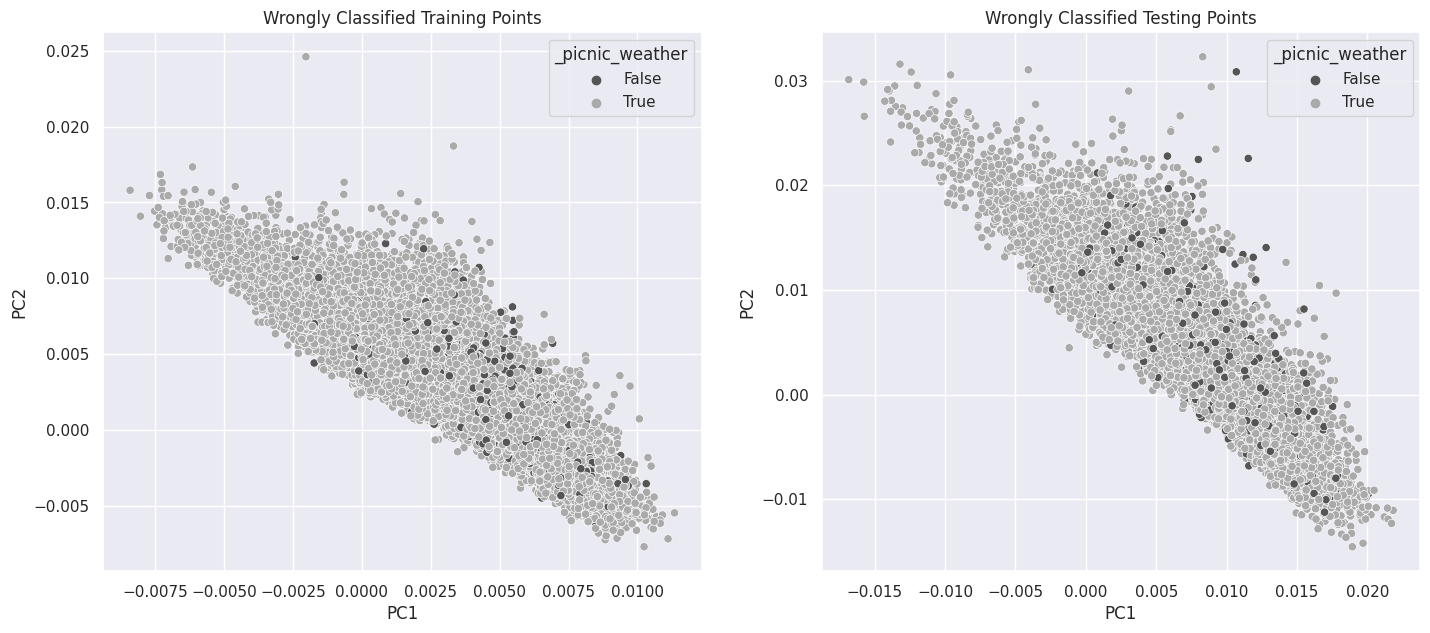

In [ ]:
# Plotting wrongly classified points using PCA.
pca = PCA(n_components = 2)
pca.fit(np.transpose(climate_training[columns].to_numpy()))

fig, axs = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(17, 7)
sns.scatterplot(x = pca.components_[0], y = pca.components_[1], hue = (model.predict(climate_training[columns]) == climate_training['_picnic_weather']), palette = 'gray', ax = axs[0])
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[0].set_title('Wrongly Classified Training Points')

pca = PCA(n_components = 2)
pca.fit(np.transpose(climate_test[columns].to_numpy()))

sns.scatterplot(x = pca.components_[0], y = pca.components_[1], hue = (model.predict(climate_test[columns]) == climate_test['_picnic_weather']), palette = 'gray', ax = axs[1])
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].set_title('Wrongly Classified Testing Points')

plt.show()
plt.close()

A partir das visualizações acima, não é possível notar nenhuma organização clara daqueles pontos classificados incorretamente. De maneira geral, eles estão homogeneamente distribuídos sobre a massa dos dados, sem nenhum padrão aparente. Potencialmente, a forma de análise estabelecida aqui não captura alguma característica crítica para a tarefa de classificação do modelo.

Um detalhe que deve ser mencionado é o fato de que a escolha entre os conjuntos de treino e de teste foi um processo aleatório e, portanto, sujeito a anomalias estatísticas. Em particular, pode ter sido muito bem o caso de a escolha de dados para treinamento ter sido conveniente para o conjunto de teste resultante, gerando estimativas muito acima do valor esperado. A fim de se investigar essa dimensão, será realizada uma validação "K-Fold Cross Validation". Nesse método, as entradas da base de dados são randomizadas e divididas em 10 grupos, sendo, a cada momento, um utilizado para teste, enquanto os nove restantes são utilizados para treino. Em cada caso, a acurácia do modelo para com os testes e o valor de sua função de perda são computados e, ao final, sua distribuição é plotada e os valores de sua média e variância são calculados. A ideia é que um modelo pode ser dito robusto quando é sujeito a uma baixa variância em termos dos dados de treinamento. Além disso, o valor encontrado estar próximo da média amostral também é um bom indicativo da confiabilidade e da qualidade dos resultados. A seguir, tem-se as visualizações gráficas desse processo de validação. Apenas para referência, as linhas vermelhas dizem respeito às métricas computadas para um modelo treinado sobre toda a base de dados.

In [ ]:
# Shuffles dataframe rows.
climate_aux = climate.sample(frac = 1)

# Separates training and testing portions.
index = int(0.1 * climate_aux.shape[0])

# K-Fold Cross Validation
score = []
loss = []
for i in range(10):
  climate_training = pd.concat([climate_aux.iloc[0:(i * index)], climate_aux.iloc[((i + 1) * index):climate_aux.shape[0]]])
  climate_test = climate_aux.iloc[(i * index):((i + 1) * index)].copy()

  fold = MLPClassifier(hidden_layer_sizes = [15, 15], activation = 'relu', solver = 'sgd', alpha = 0, learning_rate_init = 0.001, max_iter = 200, tol = 0)
  fold = fold.fit(climate_training[columns], climate_training['_picnic_weather'])

  score.append(fold.score(climate_test[columns], climate_test['_picnic_weather']))
  loss.append(fold.loss_)

In [ ]:
# Training the model over the whole database.
fold = MLPClassifier(hidden_layer_sizes = [15, 15], activation = 'relu', solver = 'sgd', alpha = 0, learning_rate_init = 0.001, max_iter = 200, tol = 0)
fold.fit(climate[columns], climate['_picnic_weather'])
reference_score = fold.score(climate[columns], climate['_picnic_weather'])
reference_loss = fold.loss_

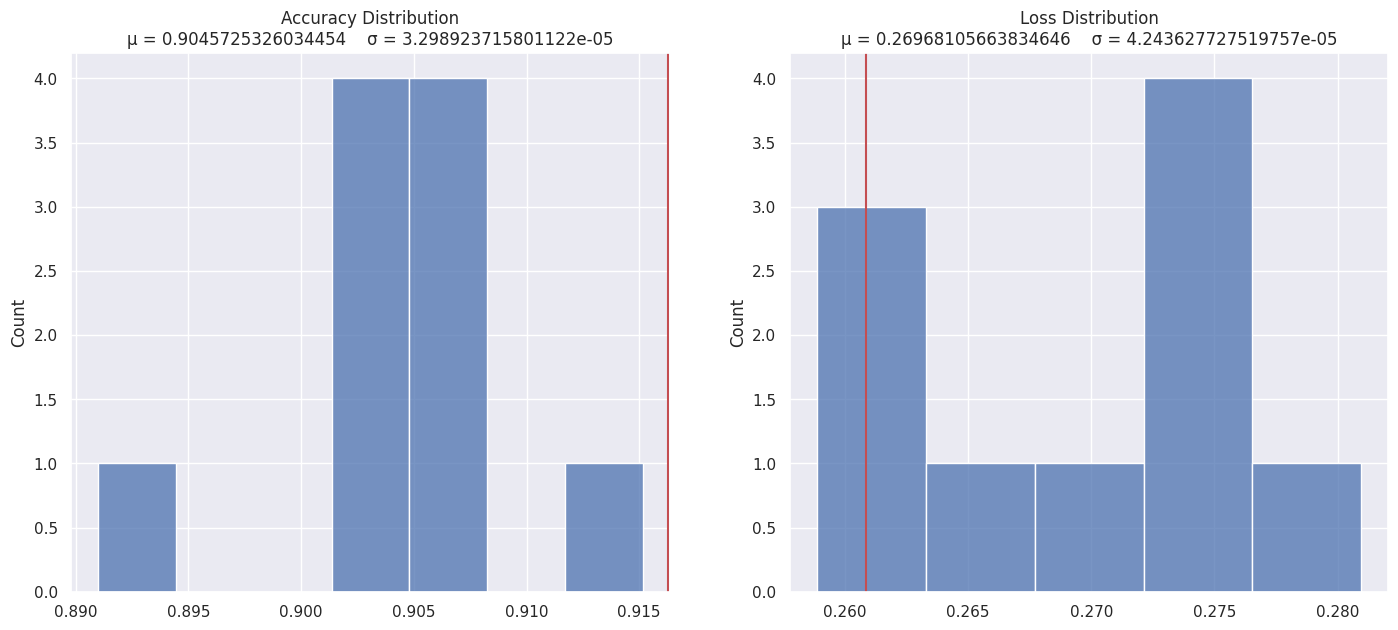

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(17, 7)
sns.histplot(x = score, ax = axs[0])
axs[0].set_title('Accuracy Distribution\nμ = ' + str(np.mean(score)) + '    σ = ' + str(np.power(np.std(score), 2)))
axs[0].axvline(x = reference_score, ymin = 0, ymax = 1, color = 'r')
sns.histplot(x = loss, ax = axs[1])
axs[1].set_title('Loss Distribution\nμ = ' + str(np.mean(loss)) + '    σ = ' + str(np.power(np.std(loss), 2)))
axs[1].axvline(x = reference_loss, ymin = 0, ymax = 1, color = 'r')
plt.show()
plt.close()

In [ ]:
del climate_aux

A partir dos gráficos, pode-se observar que a variância, em ambos os casos, não é elevada, aludindo à robustez do modelo adotado. Além disso, é possível verificar empiricamente que os valores de acurária e de perda efetivamente encontrados estão próximos da média das 10 amostras, de modo que apresentam algum grau razoável de confiabilidade. No caso, na situação em que houve algum desvio maior, é extremamente complexo traçar com precisão a causa para esse resultado, podendo ela ter sido alguma variação no processo de otimização do modelo, alguma separação "sortuda" entre conjuntos de treino e de teste ou mesmo alguma falha ou ruído no algoritmo ou nos dados.

Por fim, um último aspecto que pode ser questinado é a existência de uma relação de dependência real entre a variável dependente elencada, no caso, a qualidade do dia para um piquenique, e suas variáveis independentes, sejam elas as condições climáticas do dia. Em particular, pode ser o caso de ambos esses conjuntos serem independentes entre si, isto é, as variáveis independentes não explicam de maneira alguma o comportamento da variável dependente. A fim de se avaliar esse aspecto, um teste de hipótese pode ser construído. A hipótese nula é determinada como as variáveis independentes não explicarem o comportamento da variável dependente, enquando que a hipótese alternativa estabelece alguma dependência entre essas variáveis. Para fins de verificação da validade da hipótese nula, a rede neural modelada na seção anterior é treinada sobre toda a base de dados, utilizando para tal os rótulos reais de cada instância. Sob a premissa de independência, a ordem dos rótulos das entradas não deveria impactar a qualidade da predição do modelo, já que as variáveis independentes não explicariam de forma alguma a variável dependente e, portanto, seu rótulo seria insignificante. Em outras palavras, sob a hipótese nula, é esperado que a acurácia da MLP sobre o conjunto de dados não varie significativamente caso seus rótulos forem randomizados. Nesse sentido, esse processo é realizado 1000 vezes e, em cada uma, a métrica de acurácia é computada. Os resultados são plotados em um histograma de forma a representar visualmente sua distribuição. O valor estimado da base de dados original, por sua vez, também é plotado para avaliar sua significância estatística.

In [ ]:
# Hypothesis test.
# Shuffles labels and compute metric.
climate_aux = climate.copy()

shuffle = MLPClassifier(hidden_layer_sizes = [15, 15], activation = 'relu', solver = 'sgd', alpha = 0, learning_rate_init = 0.001, max_iter = 200, tol = 0)
shuffle.fit(climate_aux[columns], climate_aux['_picnic_weather'])
shuffle_accuracy = shuffle.score(climate_aux[columns], climate_aux['_picnic_weather'])

score = []
for i in range(1000):
  climate_aux['_picnic_weather'] = climate_aux['_picnic_weather'].sample(frac = 1)
  score.append(shuffle.score(climate_aux[columns], climate_aux['_picnic_weather']))

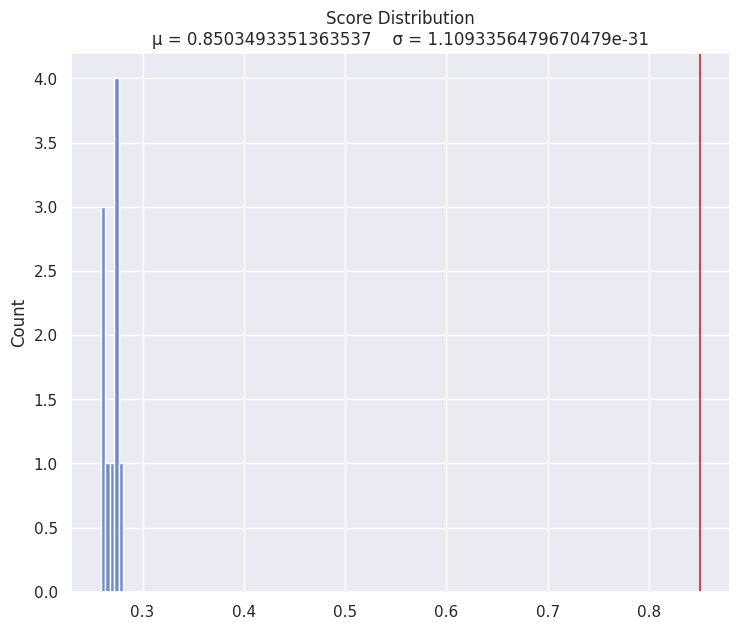

In [ ]:
# Plots distribution and estimated value.
fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(8.5, 7)
sns.histplot(x = score, ax = axs)
axs.set_title('Score Distribution\nμ = ' + str(np.mean(score)) + '    σ = ' + str(np.power(np.std(score), 2)))
axs.axvline(x = shuffle_accuracy, ymin = 0, ymax = 1, color = 'r')
plt.show()
plt.close()

A partir do gráfico, é clara a significância estatística do valor estimado, o que permite que a hipótese nula seja recusada e, portanto, reafirma a dependência entre a variável dependente e suas variáveis independentes. Em outras palavras, com uma alta confiabilidade, é possível afirmar que os atributos climáticos do dia são capazes de explicar sua qualidade para a realização de um piquenique.

## **Adendo: Análise do Impacto Temporal na Previsão do Modelo**

Retomando uma das ressalvas mencionadas na introdução deste trabalho, quando o objeto de estudo são dados sujeitos à ação do tempo, a generalização do modelo para situações práticas é um pouco mais delicada. Em particular, no caso do clima, as condições de um mesmo dia tendem a variar para diferentes anos e, de maneira mais geral, as relações e as consequências são alteradas em um espectro contínuo, de modo que os conhecimentos válidos em um momento podem deixar de ser em um seguinte. Nesses casos, pensa-se em modelos de aprendizado contínuo, os quais são constantemente alimentados com novos dados e, inclusive, podem aprender tendências de mudança e se adaptar. A fim de explorar um pouco mais essa dimensão, a seguir, a rede neural construída anteriormente será treinada no conjunto de dados climáticos referentes apenas ao ano 2000. Em seguida, a acurácia de classificação para os dados dos anos seguintes será computada e plotada em uma reta temporal, permitindo avaliar a evolução da capacidade de previsão do modelo com a passagem do tempo.

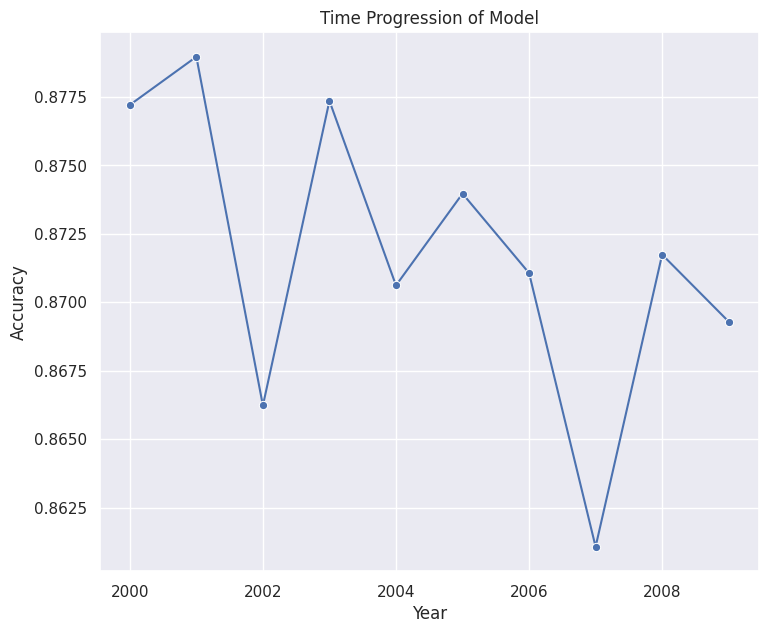

In [ ]:
# Trains the model on 2000's data and compute metrics over next years' data.
base_year = 20000000
base_limit = 10000
climate_2000 = climate[climate['DATE'] - base_year < base_limit]
model_2000 = MLPClassifier(hidden_layer_sizes = [15, 15], activation = 'relu', solver = 'sgd', alpha = 0, learning_rate_init = 0.001, max_iter = 200, tol = 0)
model_2000.fit(climate_2000[columns], climate_2000['_picnic_weather'])

score = [model_2000.score(climate_2000[columns], climate_2000['_picnic_weather'])]
for i in range(1, 10):
  climate_year = climate[(climate['DATE'] - (base_year + i * base_limit) < base_limit) & (climate['DATE'] - (base_year + i * base_limit) > 0)]
  score.append(model_2000.score(climate_year[columns], climate_year['_picnic_weather']))

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(8.5, 7)
sns.lineplot(x = np.linspace(2000, 2009, 10), y = score, marker = 'o', ax = axs)
axs.set_xlabel('Year')
axs.set_ylabel('Accuracy')
axs.set_title('Time Progression of Model')
plt.show()
plt.close()

A partir da visualização acima, é possível observar que, de fato, a acurácia da previsão diminui conforme o tempo passa. De maneira mais expressiva, o modelo treinado com os dados do ano 2000 apresenta uma capacidade preditiva que diminui com o decorrer dos anos, indicando uma degradação dos conhecimentos aprendidos, isto é, uma alteração de como o objeto de estudo, no caso, o clima, comporta-se. Interessantemente, há anos para os quais a acurácia é, inclusive, maior que a do ano de treinamento, além de que o menor valor observado não diz respeito ao ano mais distante. Entretanto, traçar a causa para esses fatores, novamente, é um processo extremamente complexo e pode tangenciar mecanismos aleatórios na otimização do modelo, irregularidades nos dados, inadequação das abordagens adotadas, dentre outros.

## **Implantação e Conclusões**

O presente trabalho prático teve por objetivo o desenvolvimento de um modelo de regressão capaz de, a partir das condições climáticas de um dia, predizer se ele seria adequado ou não à realização de um piquenique. De maneira mais geral, teve-se por meta a elaboração de um algoritmo para previsão do tempo, o qual poderia ser utilizado para fins de aprimoramento da logística e da operacionalização do negócio. Nesse sentido, pensa-se que um sucesso foi alcançado, o qual é manifestado, principalmente, pela alta taxa de acurácia obtida sobre os dados de treino e de teste (por volta de 90%). Além disso, experimentos estatísticos reafirmaram a robustez do modelo e a correlação entre as informações, o que também são aspectos positivos passíveis de serem agregados a essa conclusão de sucesso. Reiterando aquilo expresso ao decorrer deste estudo, a situação problema abordada, assim como o modelo construído, foram simplificados para fins didáticos, mas redes mais complexas capazes de atuar sobre cenários reais podem ser construídas por meio de extensões dos conhecimentos aqui adquiridos.

Neste último ponto, porém, retoma-se as ressalvas elencadas previamente, assim como algumas decisões tomadas no processo de preparação dos dados. Uma grande dificuldade na construção de modelos sobre informações muito suscetíveis à ação do tempo, como é o caso do clima, é justamente a manutenção de uma boa capacidade preditiva e de conhecimentos que, de fato, reflitam a realidade. Isso foi observado na seção [Adendo], na qual ficou claro que existe uma deterioração do modelo conforme a passagem dos anos. Além disso, outra questão é que a abordagem adotada de se reconstruir dados faltantes com base nas informações em posse também é extremamente delicada. Em particular, ela é baseada em uma premissa fundamental de que há alguma similaridade entre os dados existentes e aqueles em falta, o que não necessariamente é verdade. Como consequência, conhecimentos críticos sobre as características climáticas das cidades que não contemplavam todos os atributos podem ter sido ignorados ou amortizados sob o modelo de regressão, o que tem potencial para originar incompatibilidades para com a realidade e, naturalmente, previsões incorretas.

Finalmente, uma última questão que também foi pincelada em algumas seções foi a extrema complexidade que está envolvida na traçagem de problemas em um modelo de regressão baseado em uma pequena rede neural. Anomalias observadas nos resultados, como taxas de acurácia muito abaixo ou muito acima do valor médio, grandes variâncias com relação ao conjunto de treino escolhido ou estagnações no aprendizado do modelo, dentre outras, podem estar associadas às mais diversas dimensões, como à otimização do modelo, à reconstrução dos dados, aos dados originais em si, a uma adequação dos algoritmos e dos parâmetros, dentre outras. Esse cenário é uma manifestação concreta da aleatoriedade presente em muitas abordagens adotadas e na própria incerteza inerente à ciência de dados em si, o que enaltece a relevância de estudos estatísticos e de métricas de confiança para a produção de resultados robustos.

## **Referências Bibliográficas**

Stack Exchange, Inc.. Stack Overflow [Online]. Disponível em: https://stackoverflow.com/ (Acessado em: 09/12/2023).

scikit developers. SciKit Learn [Online]. Disponível em: https://scikit-learn.org/stable/index.html (Acessado em: 09/12/2023).

The pandas development team. Pandas [Online]. Disponível em: https://pandas.pydata.org/ (Acessado em: 09/12/2023).

Kaggle. Kaggle Datasets [Online]. Disponível em: https://www.kaggle.com/datasets (Acessado em: 09/12/2023).